In [117]:
import accretion as a
import accretion_objects as objects
from importlib import reload
reload(a)
reload(objects)

<module 'accretion_objects' from '/Users/joepalmo/Desktop/THESIS/errorprop/accretion_objects.py'>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb
from astropy import constants as const
import random
import astropy.constants as const
import math
from tqdm import tqdm
import extinction as ex
import pdb
import glob
import scipy.optimize as optimization
from matplotlib.animation import FuncAnimation

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [119]:
observed = pd.read_csv('accdb_updated.csv')
observed['Upper Limit'] = observed['Upper Limit'].fillna('No')
nolimit = observed[observed['Upper Limit']=='No']

In [120]:
n = objects.AccretionDistribution(nolimit)
n.bootstrap()
n.UVExcessErrorProp(0.5, 15, 0.3, 0.5, 3.5, 2, 0.4, 1000, RinUnc=2, variability=0.0, age_scatter=False)
#n.UVExcessErrorProp(0, 0, 0, 0, 3, 0, 0, 1, variability=0, age_scatter=False)
df_test = n.create_df()

In [122]:
scatter_table(n.observed, df_test, numMC=1000)

(0.27, 0.39, 0.12, 0.73, 0.4, 54.49)

In [69]:
%matplotlib

Using matplotlib backend: MacOSX


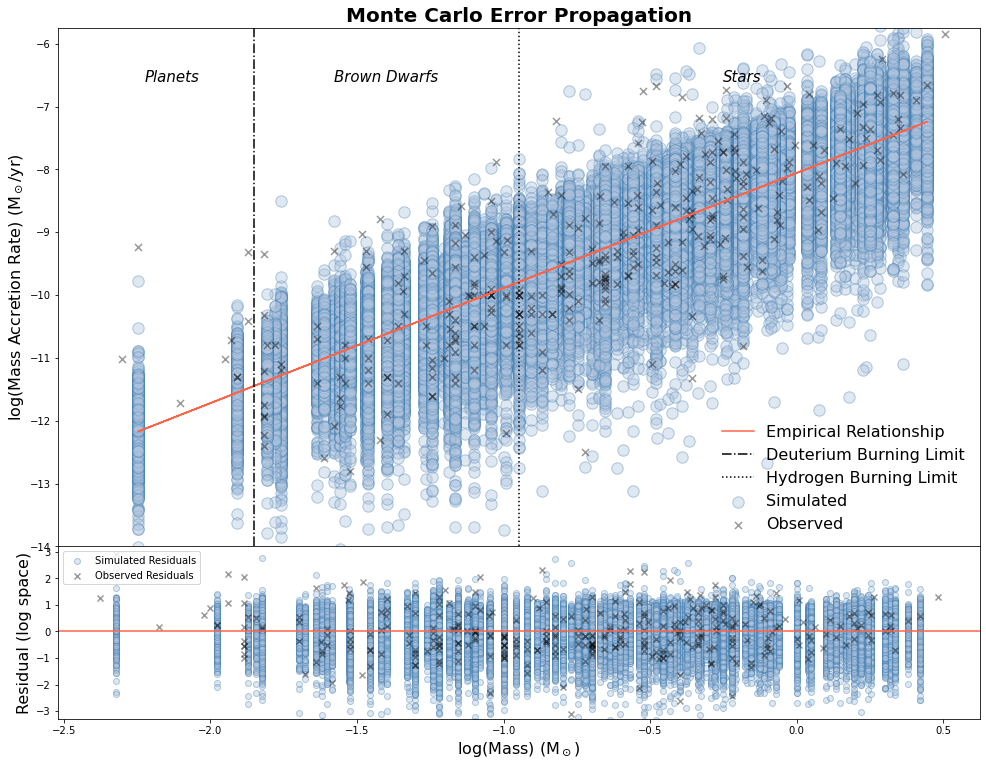

In [123]:
fig = objects.MoneyPlot(nolimit, df_test, 1000)
fig.savefig('cloudofpts.png', dpi=500)

## NumMCMoneyPlot

In [6]:
numMC = 1000

In [7]:
mass = []
for r in range(len(df_test)):
    for i in range(numMC):
        mass.append(df_test['Mass (M$_\\odot$)'][r])
mass = np.array(mass)

In [8]:
mdot = []
for r in range(len(df_test)):
    for i in range(numMC):
        if numMC == 1:
            mdot.append(df_test['Mdot (M$_\\odot$)'][r])
        else:
            mdot.append(df_test['Mdot (M$_\\odot$)'][r][i])
mdot = np.array(mdot)

In [9]:
true_mdot = []
for r in range(len(df_test)):
    for i in range(numMC):
        true_mdot.append(df_test['"true" Mdot (M$_\\odot$)'][r])
true_mdot = np.array(true_mdot)

In [10]:
logmass = np.log10(mass)
logMdot = np.log10(mdot)
logaccepted_relation = np.log10(true_mdot)
observed_mass = np.log10(n.observed['Object Mass M_Solar'])
observed_mdot = np.log10(n.observed['Accretion Rate M_solar yr-1'])

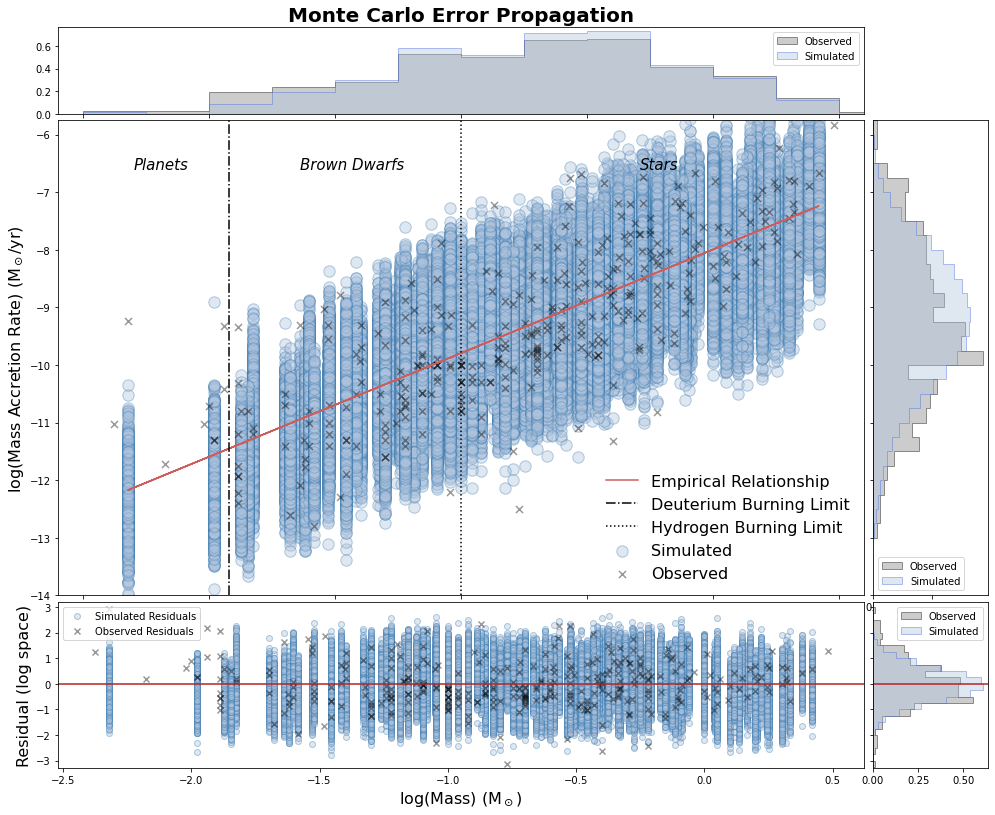

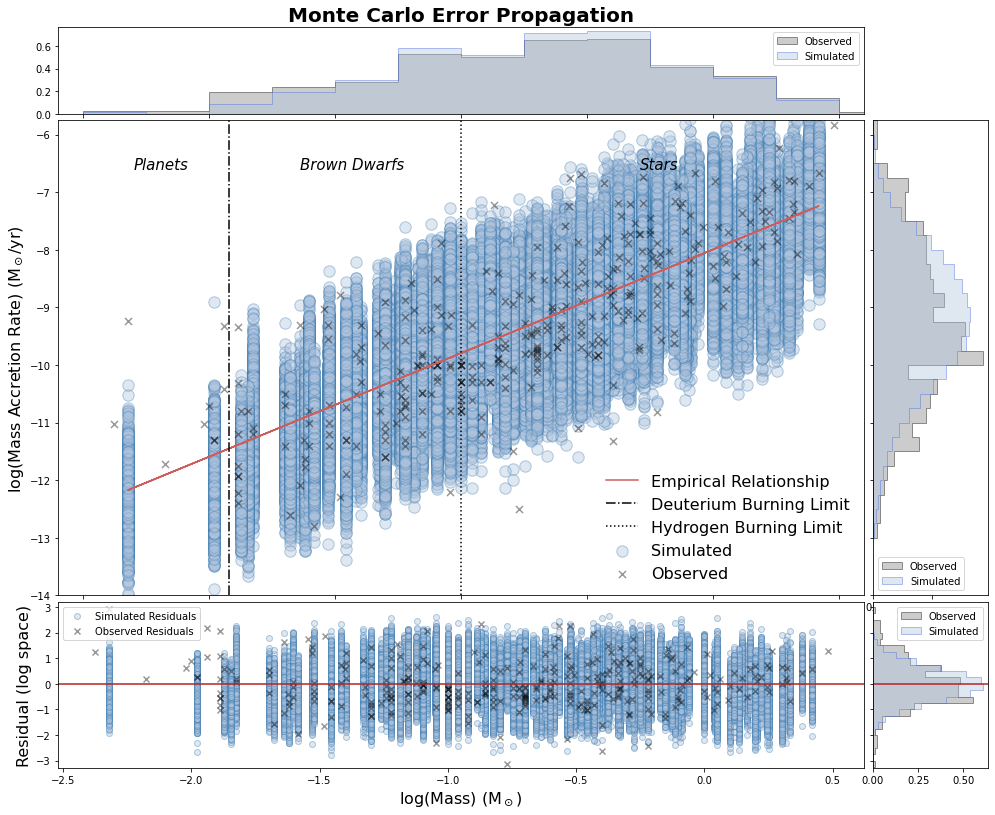

In [71]:
objects.MarginalDistribution(nolimit, df_test, 1000)

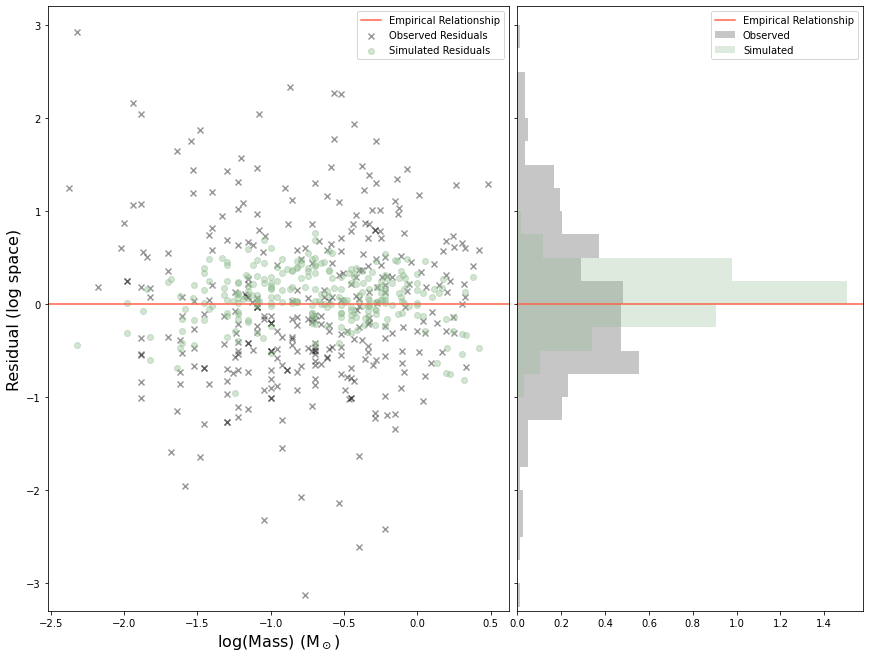

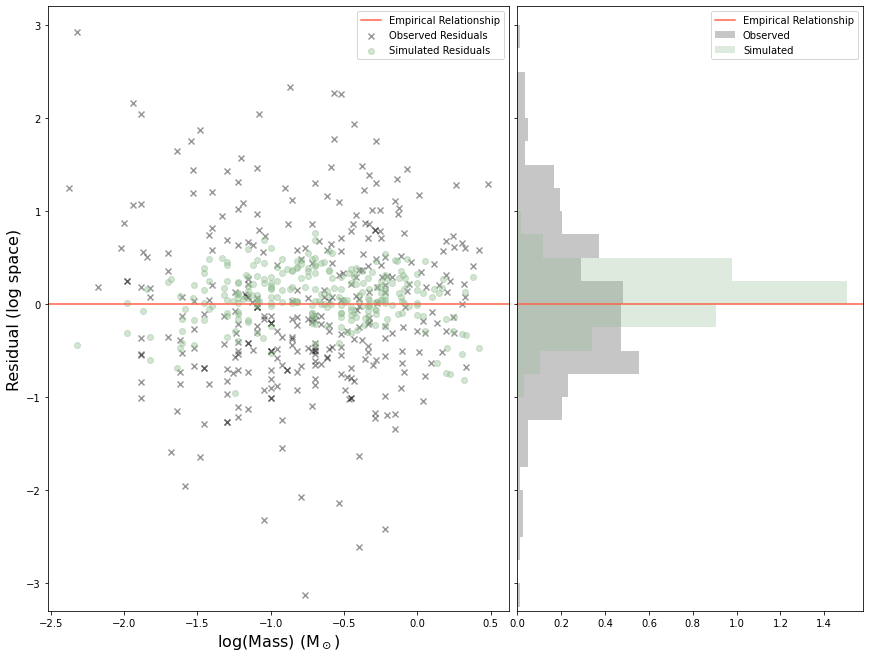

In [90]:
objects.residuals(nolimit, df_test)

In [6]:
simulated = df_test

In [12]:
df_test.head()

,Mass (M$_\odot$),Radius (R$_\odot$),Age (Myr),Distance (pc),Teff (K),Rin (R$_\odot$),Mdot (M$_\odot$),Lacc (L$_\odot$),"""true"" Mdot (M$_\odot$)","""true"" Lacc (L$_\odot$)"
0,2.400,3.6670000000000034,1.0,162.866450,5278.000000000001,18.3350,"[1.7482713663274158e-07, 2.644547284182875e-08...","[3.0463467159404893, 0.4460602271316164, 0.905...",4.905008e-08,0.806951
1,0.035,0.434,2.0,173.130194,2745.5,2.1700,"[4.893137537638341e-11, 7.83527853219665e-11, ...","[9.904819908591074e-05, 0.00015821550578676188...",2.435930e-11,0.000049
2,0.035,0.434,2.0,196.803905,2745.5,2.1700,"[5.476564531157837e-12, 4.0740370451632e-11, 1...","[1.1840801939094363e-05, 7.927275733935315e-05...",2.435930e-11,0.000049
3,0.055,0.6174999999999999,2.0,189.605809,2848.0,3.0875,"[2.961659818108778e-11, 5.956026990716219e-11,...","[5.8090037886212316e-05, 0.0001442758271074445...",5.493883e-11,0.000123
4,0.070,0.743,2.0,187.136254,2902.0,3.7150,"[3.556691580343416e-11, 3.8301015038201964e-11...","[0.0001233218237538099, 8.664851279525938e-05,...",8.478934e-11,0.000201


In [4]:
numMC=1000

In [8]:
#load in data
mass = []
for r in range(len(simulated)):
    for i in range(numMC):
        mass.append(simulated['Mass (M$_\\odot$)'][r])
mass = np.array(mass)

mdot = []
for r in range(len(simulated)):
    for i in range(numMC):
        if numMC == 1:
            mdot.append(simulated['Mdot (M$_\\odot$)'][r])
        else:
            mdot.append(simulated['Mdot (M$_\\odot$)'][r][i])
mdot = np.array(mdot)

true_mdot = []
for r in range(len(simulated)):
    for i in range(numMC):
        true_mdot.append(simulated['"true" Mdot (M$_\\odot$)'][r])
true_mdot = np.array(true_mdot)

logmass = np.log10(mass)
logMdot = np.log10(mdot)
logaccepted_relation = np.log10(true_mdot)
observed_mass = np.log10(observed['Object Mass M_Solar'])
observed_mdot = np.log10(observed['Accretion Rate M_solar yr-1'])

#Calculate Residuals
observed_difference = np.log10(observed['Accretion Rate M_solar yr-1']) - np.log10(a.empiricalMdot(observed['Object Mass M_Solar']))
simulated_difference = logMdot - np.log10(a.empiricalMdot(10**logmass))

In [13]:
observed = nolimit

In [48]:
#observed R^2
observed_matrix = observed[['Object Mass M_Solar', 'Accretion Rate M_solar yr-1']].dropna().reindex()

In [49]:
observed_corr_matrix = np.corrcoef(observed_matrix['Object Mass M_Solar'], observed_matrix['Accretion Rate M_solar yr-1'])
observed_corr_xy = observed_corr_matrix[0,1]
observed_Rsquared = observed_corr_xy**2
print(observed_Rsquared)

0.2474325065014038


In [147]:
#simulated R^2 distribution
#mdot matrix with rows corresponding to object, and columns corresponding to iteration of simulation
mdot_matrix = np.vstack(simulated['Mdot (M$_\\odot$)'])

In [146]:
mdot_matrix.reshape(-1)

array([1.74827137e-07, 2.64454728e-08, 5.47451696e-08, ...,
       6.88554948e-14, 9.78153326e-13, 5.82869547e-13])

In [63]:
len(mdot_matrix[:,0])

269

In [91]:
numMC = 1000
sim_Rsquared_distribution = []
for n in np.arange(numMC):
    corr_matrix = np.corrcoef(simulated['Mass (M$_\\odot$)'], mdot_matrix[:,n])
    corr_xy = corr_matrix[0,1]
    sim_Rsquared = corr_xy**2
    sim_Rsquared_distribution.append(sim_Rsquared)

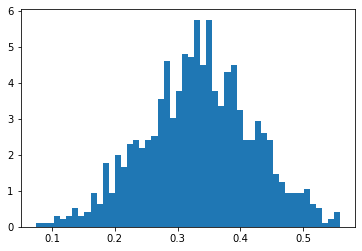

In [92]:
plt.hist(sim_Rsquared_distribution, density=True, bins=50)
plt.show()

In [93]:
np.nanmean(sim_Rsquared_distribution)

0.3337528186643417

In [94]:
np.nanstd(sim_Rsquared_distribution)

0.08649087868651395

In [153]:
mass = np.array(simulated['Mass (M$_\\odot$)'])
mass = np.array(([mass])*1000)
mass.transpose().reshape(-1)
#mass[:] = mass[:]*np.ones(1000)

array([2.4    , 2.4    , 2.4    , ..., 0.00477, 0.00477, 0.00477])

In [5]:
def scatter_table(observed, simulated, numMC=1):
    
    #R^2 calculation
    ##observed R^2
    observed_matrix = observed[['Object Mass M_Solar', 'Accretion Rate M_solar yr-1']].dropna().reindex()
    observed_corr_matrix = np.corrcoef(observed_matrix['Object Mass M_Solar'], observed_matrix['Accretion Rate M_solar yr-1'])
    observed_corr_xy = observed_corr_matrix[0,1]
    observed_Rsquared = observed_corr_xy**2
    
    #simulated R^2 distribution
    #mdot matrix with rows corresponding to object, and columns corresponding to iteration of simulation
    mdot_matrix = np.vstack(simulated['Mdot (M$_\\odot$)'])
    
    sim_Rsquared_distribution = []
    for i in np.arange(numMC):
        corr_matrix = np.corrcoef(simulated['Mass (M$_\\odot$)'], mdot_matrix[:,i])
        corr_xy = corr_matrix[0,1]
        sim_Rsquared = corr_xy**2
        sim_Rsquared_distribution.append(sim_Rsquared)
    
    sim_Rsquared_mean = np.nanmean(sim_Rsquared_distribution)
    sim_Rsquared_std = np.nanstd(sim_Rsquared_distribution)
    
    #load in data to calculate MAD
    mass = np.array(simulated['Mass (M$_\\odot$)'])
    mass = np.array(([mass])*numMC)
    mass = mass.transpose().reshape(-1)
    
    true_mdot = np.array(simulated['"true" Mdot (M$_\\odot$)'])
    true_mdot = np.array(([true_mdot])*numMC)
    true_mdot = true_mdot.transpose().reshape(-1)
    
    mdot = mdot_matrix.reshape(-1)
    
    logmass = np.log10(mass)
    logMdot = np.log10(mdot)
    logaccepted_relation = np.log10(true_mdot)
    observed_mass = np.log10(observed['Object Mass M_Solar'])
    observed_mdot = np.log10(observed['Accretion Rate M_solar yr-1'])

    #Calculate Residuals
    observed_difference = np.log10(observed['Accretion Rate M_solar yr-1']) - np.log10(a.empiricalMdot(observed['Object Mass M_Solar']))
    simulated_difference = logMdot - np.log10(a.empiricalMdot(10**logmass))
    
    #Calculate MAD
    mad_observed = st.median_absolute_deviation(observed_difference, nan_policy='omit')
    mad_simulated = st.median_absolute_deviation(simulated_difference, nan_policy='omit')
    
    # % of scatter recreated by simulated distribution
    pct_recreated = (mad_simulated/mad_observed)*100
    
    return round(observed_Rsquared,2), round(sim_Rsquared_mean,2), round(sim_Rsquared_std,2), round(mad_observed,2), round(mad_simulated,2), round(pct_recreated,2)

In [177]:
scatter_table(n.observed, df_test, numMC=1000)

NameError: name 'df_test' is not defined

### Better try at a scatter table

In [34]:
scatter_df = pd.DataFrame(columns=['Quantity', 'Uncertainty Value', 'Units', 'Dependent Variables', r'mean R$^{2}$ (independently)',
                                   r'R$^{2}$ std. dev. (independently)', 'MAD (independently)', 'MAD percentage of scatter (independently)', 
                                     r'mean R$^{2}$ (running total)', r'R$^{2}$ std. dev. (running total)',
                                  'MAD (running total)', 'MAD percentage of scatter (running total)',])

In [35]:
#Age, Distance, Rin, Spectral Type, UV Excess Flux, Bolometric Correction, Extinction
scatter_df['Uncertainty Value'] = [0.3, 15, 2, 0.5, 0.4, 2, 0.5, 'N/A', 0.25]
scatter_df['Quantity'] = ['Age', 'Distance', r'R$_{in}$', 'Spectral Type', 'UV Excess Flux', 
                          'Bolometric Correction (Input Value is 3.5)','Extinction', 'Age Scatter', 'Variability']
scatter_df['Units'] = ['Myr','pc', r'R$_{\star}$', 'subclasses', '% error as decimal', 'scale factor', r'A$_{v}$ mag',
                        'N/A', r'dex $(\dot{M})$']
scatter_df['Dependent Variables'] = [r'M$_{\star}$, R$_{\star}$, R$_{in}$', 'L$_{acc}$', r'R$_{in}$', r'M$_{\star}$, R$_{\star}$, R$_{in}$', 'L$_{acc}$', 
                                     'L$_{acc}$', 'L$_{acc}$', 'N/A', 'N/A']
scatter_df

,Quantity,Uncertainty Value,Units,Dependent Variables,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Age,0.3,Myr,"M$_{\star}$, R$_{\star}$, R$_{in}$",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Distance,15,pc,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R$_{in}$,2,R$_{\star}$,R$_{in}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Spectral Type,0.5,subclasses,"M$_{\star}$, R$_{\star}$, R$_{in}$",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UV Excess Flux,0.4,% error as decimal,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bolometric Correction (Input Value is 3.5),2,scale factor,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Extinction,0.5,A$_{v}$ mag,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age Scatter,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Variability,0.25,dex $(\dot{M})$,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
'''
scatter_df['Uncertainty Value'] = [0.5, 15, 0.3, 0.5, 2, 0.4, 2, 0.25, 'N/A']
scatter_df['Quantity'] = ['Spectral Type', 'Distance', 'Age', 'Extinction', 'Bolometric Correction (Input Value is 3.5)',
                         'UV Excess Flux', r'R$_{in}$', 'Variability', 'Age Scatter']
scatter_df['Units'] = ['subclasses', 'pc', 'Myr', r'A$_{v}$ mag', 'scale factor', '% error as decimal', 
                       r'R$_{\star}$', r'dex $(\dot{M})$', 'N/A']
scatter_df['Dependent Variables'] = [r'M$_{\star}$, R$_{\star}$, R$_{in}$', 'L$_{acc}$', r'M$_{\star}$, R$_{\star}$, R$_{in}$', 'L$_{acc}$', 
                                     'L$_{acc}$', 'L$_{acc}$', r'R$_{in}$', 'N/A', 'N/A']
scatter_df
'''

,Quantity,Uncertainty Value,Units,Dependent Variables,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Spectral Type,0.5,subclasses,"M$_{\star}$, R$_{\star}$, R$_{in}$",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Distance,15,pc,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Age,0.3,Myr,"M$_{\star}$, R$_{\star}$, R$_{in}$",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Extinction,0.5,A$_{v}$ mag,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bolometric Correction (Input Value is 3.5),2,scale factor,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UV Excess Flux,0.4,% error as decimal,L$_{acc}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R$_{in}$,2,R$_{\star}$,R$_{in}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Variability,0.25,dex $(\dot{M})$,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Age Scatter,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# function to return key for any value
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
            return key
 
    return "key doesn't exist"

In [62]:
def clear_input_dict():
    return {'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3.5, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1, 'RinUnc':0, 'variability':0, 'age_scatter':False}

In [63]:
input_dict = {'SpTyUnc':0.5, 'distUnc':15, 'ageUnc':0.3, 'AvUnc':0.5, 'bc':3.5, 'bcUnc':2, 'UVExcessUnc':0.4, 'numMC':1, 'RinUnc':2, 'variability':0, 'age_scatter':False}
index_dict = {'SpTyUnc':0, 'distUnc':1, 'ageUnc':2, 'AvUnc':3, 'bcUnc':4, 'UVExcessUnc':5, 'RinUnc':6, 'variability':7, 'age_scatter':8}
get_key(index_dict, 3)
#n.UVExcessErrorProp(0.5, 15, 0.3, 0.5, 3, 0.5, 0.2, 1000, RinUnc=1, variability=0.3, age_scatter=True)

'AvUnc'

In [64]:
observed_scatter_df = pd.DataFrame(columns=['Quantity', r'R$^{2}$', 'MAD'])
observed_scatter_df.loc[0]=('Total Observed Scatter', round(0.26984485600977887,2), round(0.7321773558450869,2))
observed_scatter_df

,Quantity,R$^{2}$,MAD
0,Total Observed Scatter,0.27,0.73


In [65]:
individual_dfs=[]
runningtotal_dfs=[]

In [66]:
#create bootstrapped distribution
n = objects.AccretionDistribution(nolimit)
n.bootstrap()

#to keep track of uncertainties propagated so far
input_dict = clear_input_dict()
index_dict = {'SpTyUnc':3, 'distUnc':1, 'ageUnc':0, 'AvUnc':6, 'bcUnc':5, 'UVExcessUnc':4, 
              'RinUnc':2, 'variability':8, 'age_scatter':7}

for i,u in enumerate(scatter_df['Uncertainty Value']):
    
    unc_key = get_key(index_dict, i)
    
    #propagate uncertainties independently
    clear_dict = clear_input_dict()
    if unc_key == 'age_scatter':
        clear_dict['age_scatter'] = True
    else:
        clear_dict[unc_key] = u
    n.UVExcessErrorProp(clear_dict['SpTyUnc'], clear_dict['distUnc'], clear_dict['ageUnc'], clear_dict['AvUnc'], 
                        clear_dict['bc'], clear_dict['bcUnc'], clear_dict['UVExcessUnc'], clear_dict['numMC'], 
                        RinUnc=clear_dict['RinUnc'], variability=clear_dict['variability'], 
                        age_scatter=clear_dict['age_scatter'])
    df_individual = n.create_df()
    indiv_scatter = scatter_table(n.observed, df_individual, numMC=1)
    scatter_df[r'mean R$^{2}$ (independently)'][i] = indiv_scatter[1]
    scatter_df[r'R$^{2}$ std. dev. (independently)'][i] = indiv_scatter[2]
    scatter_df['MAD (independently)'][i] = indiv_scatter[4]
    scatter_df['MAD percentage of scatter (independently)'][i] = indiv_scatter[5]
    individual_dfs.append(df_individual)
    
    #propagate uncertainties on top of each other
    
    if unc_key == 'age_scatter':
        input_dict['age_scatter'] = True
    else:
        input_dict[unc_key] = u
    n.UVExcessErrorProp(input_dict['SpTyUnc'], input_dict['distUnc'], input_dict['ageUnc'], input_dict['AvUnc'], 
                        input_dict['bc'], input_dict['bcUnc'], input_dict['UVExcessUnc'], input_dict['numMC'], 
                        RinUnc=input_dict['RinUnc'], variability=input_dict['variability'], 
                        age_scatter=input_dict['age_scatter'])
    df_runningtotal = n.create_df()
    runningtotal_scatter = scatter_table(n.observed, df_runningtotal, numMC=1)
    scatter_df[r'mean R$^{2}$ (running total)'][i] = runningtotal_scatter[1]
    scatter_df[r'R$^{2}$ std. dev. (running total)'][i] = runningtotal_scatter[2]
    scatter_df['MAD (running total)'][i] = runningtotal_scatter[4]
    scatter_df['MAD percentage of scatter (running total)'][i] = runningtotal_scatter[5]
    runningtotal_dfs.append(df_runningtotal)

In [42]:
scatter_df

,Quantity,Uncertainty Value,Units,Dependent Variables,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Age,0.3,Myr,"M$_{\star}$, R$_{\star}$, R$_{in}$",0.9,0,0,0,0.9,0,0,0
1,Distance,15,pc,L$_{acc}$,0.9,0,0.02,2.38,0.9,0,0.02,2.37
2,R$_{in}$,2,R$_{\star}$,R$_{in}$,0.81,0.17,0.03,4.21,0.81,0.18,0.04,5.27
3,Spectral Type,0.5,subclasses,"M$_{\star}$, R$_{\star}$, R$_{in}$",0.9,0,0.05,6.36,0.81,0.18,0.07,9.55
4,UV Excess Flux,0.4,% error as decimal,L$_{acc}$,0.77,0.05,0.17,23.3,0.7,0.15,0.19,26.48
5,Bolometric Correction (Input Value is 3.5),2,scale factor,L$_{acc}$,0.77,0.04,0.18,24.16,0.59,0.15,0.28,38.92
6,Extinction,0.5,A$_{v}$ mag,L$_{acc}$,0.53,0.12,0.26,35.73,0.39,0.12,0.4,54.46
7,Age Scatter,N/A,N/A,N/A,0.59,0,0.31,42.35,0.3,0.1,0.51,70.18
8,Variability,0.25,dex $(\dot{M})$,N/A,0.65,0.09,0.25,34.15,0.26,0.07,0.57,78.46


In [18]:
indiv_scatter

(0.27, 0.58, 0.0, 0.73, 0.3, 41.55)

In [19]:
runningtotal_scatter

(0.27, 0.3, 0.08, 0.73, 0.54, 73.94)

In [21]:
individual_dfs[0].head()

,Mass (M$_\odot$),Radius (R$_\odot$),Age (Myr),Distance (pc),Teff (K),Rin (R$_\odot$),Mdot (M$_\odot$),Lacc (L$_\odot$),"""true"" Mdot (M$_\odot$)","""true"" Lacc (L$_\odot$)"
0,2.400,3.6670000000000034,1.0,162.866450,5278.000000000001,18.3350,"[4.938512921761472e-08, 4.858844176504284e-08,...","[0.8069507961945716, 0.8069507961945716, 0.806...",4.905008e-08,0.806951
1,0.035,0.434,2.0,173.130194,2745.5,2.1700,"[2.144035677651893e-11, 2.270388441361659e-11,...","[4.9379885011281554e-05, 4.937988501128154e-05...",2.435930e-11,0.000049
2,0.035,0.434,2.0,196.803905,2745.5,2.1700,"[2.3223796583744165e-11, 2.3777920794697785e-1...","[4.9379885011281534e-05, 4.937988501128154e-05...",2.435930e-11,0.000049
3,0.055,0.6174999999999999,2.0,189.605809,2848.0,3.0875,"[5.5955865445537467e-11, 5.224694800124484e-11...","[0.00012300197685021194, 0.0001230019768502119...",5.493883e-11,0.000123
4,0.070,0.743,2.0,187.136254,2902.0,3.7150,"[8.490246272166795e-11, 6.89166764851491e-11, ...","[0.0002007971098208124, 0.0002007971098208124,...",8.478934e-11,0.000201


In [20]:
scatter_df

,Quantity,Uncertainty Value,Units,Dependent Variables,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Spectral Type,0.5,subclasses,"M$_{\star}$, R$_{\star}$, R$_{in}$",0.9,0,0.05,6.39,0.9,0,0.05,6.39
1,Distance,15,pc,L$_{acc}$,0.9,0,0.02,2.37,0.9,0,0.05,7.41
2,Age,0.3,Myr,"M$_{\star}$, R$_{\star}$, R$_{in}$",0.9,0,0,0,0.9,0,0.05,7.43
3,Extinction,0.5,A$_{v}$ mag,L$_{acc}$,0.7,0.09,0.17,22.86,0.69,0.08,0.18,25.07
4,Bolometric Correction (Input Value is 3.5),2,scale factor,L$_{acc}$,0.76,0.05,0.18,24.17,0.6,0.09,0.27,36.24
5,UV Excess Flux,0.4,% error as decimal,L$_{acc}$,0.77,0.05,0.17,23.35,0.53,0.09,0.34,45.84
6,R$_{in}$,2,R$_{\star}$,R$_{in}$,0.81,0.19,0.03,4.22,0.48,0.13,0.34,46.6
7,Variability,0.25,dex $(\dot{M})$,N/A,0.66,0.08,0.25,34.27,0.41,0.12,0.43,59.03
8,Age Scatter,N/A,N/A,N/A,0.58,0,0.3,41.55,0.3,0.08,0.54,73.94


In [ ]:
#Age, Distance, Rin, Spectral Type, Extinction, UV Excess Flux, Bolometric Correction, ------ Age Scatter then Variability

In [57]:
roundtwo

NameError: name 'roundtwo' is not defined

In [121]:
pd.DataFrame(roundtwo.loc[8]).transpose()

,Quantity,Uncertainty Value,Units,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
8,Age Scatter,N/A,N/A,0.578151,0,0.307631,42.0159,0.338637,0.0874523,0.505548,69.0472


In [65]:
order = scatter_df.sort_values('MAD percentage of scatter (independently)')

In [68]:
order = order.reset_index(drop=True)
pd.DataFrame(order.loc[0]).transpose()

,Quantity,Uncertainty Value,Units,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Age,0.3,Myr,0.902378,1.11022e-16,0,0,0.899926,0.0034261,0.0542924,7.4152


In [29]:
pd.DataFrame(scatter_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,10
0,Quantity,Uncertainty Value,Units,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)


### Trying to plot results

In [43]:
mdot_matrix = np.vstack(df_runningtotal['Mdot (M$_\\odot$)'])
mdot_matrix.shape[0]

269

In [67]:
def scatter_plot(observed, simulated, r2, MAD, numMC=1, title=''):
    
    #R^2 calculation
    ##observed R^2
    observed_matrix = observed[['Object Mass M_Solar', 'Accretion Rate M_solar yr-1']].dropna().reindex()
    observed_corr_matrix = np.corrcoef(observed_matrix['Object Mass M_Solar'], observed_matrix['Accretion Rate M_solar yr-1'])
    observed_corr_xy = observed_corr_matrix[0,1]
    observed_Rsquared = observed_corr_xy**2
    
    #simulated R^2 distribution
    #mdot matrix with rows corresponding to object, and columns corresponding to iteration of simulation
    mdot_matrix = np.vstack(simulated['Mdot (M$_\\odot$)'])
    
    sim_Rsquared_distribution = []
    for i in np.arange(numMC):
        corr_matrix = np.corrcoef(simulated['Mass (M$_\\odot$)'], mdot_matrix[:,i])
        corr_xy = corr_matrix[0,1]
        sim_Rsquared = corr_xy**2
        sim_Rsquared_distribution.append(sim_Rsquared)
    
    sim_Rsquared_mean = np.nanmean(sim_Rsquared_distribution)
    sim_Rsquared_std = np.nanstd(sim_Rsquared_distribution)
    
    #load in data to calculate MAD
    mass = np.array(simulated['Mass (M$_\\odot$)'])
    mass = np.array(([mass])*numMC)
    mass = mass.transpose().reshape(-1)
    
    true_mdot = np.array(simulated['"true" Mdot (M$_\\odot$)'])
    true_mdot = np.array(([true_mdot])*numMC)
    true_mdot = true_mdot.transpose().reshape(-1)
    
    mdot = mdot_matrix.reshape(-1)
    
    logmass = np.log10(mass)
    logMdot = np.log10(mdot)
    logaccepted_relation = np.log10(true_mdot)
    observed_mass = np.log10(observed['Object Mass M_Solar'])
    observed_mdot = np.log10(observed['Accretion Rate M_solar yr-1'])

    #Calculate Residuals
    observed_difference = np.log10(observed['Accretion Rate M_solar yr-1']) - np.log10(a.empiricalMdot(observed['Object Mass M_Solar']))
    simulated_difference = logMdot - np.log10(a.empiricalMdot(10**logmass))
    
    #Calculate MAD
    mad_observed = st.median_absolute_deviation(observed_difference, nan_policy='omit')
    mad_simulated = st.median_absolute_deviation(simulated_difference, nan_policy='omit')
    
    # % of scatter recreated by simulated distribution
    pct_recreated = (mad_simulated/mad_observed)*100
    
    #Text to display
    scatterstats = '\n'.join((
                    r'$R^2=%.2f$' % (r2),
                    r'$\mathrm{MAD}\ percentage=%.2f$' % (MAD),))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    #Plot classic figure
    fig = plt.figure(figsize=(16, 12))
    frame1 = fig.add_axes((.1,.3,.8,.6))
    frame1.scatter(logmass, logMdot, facecolor='lightsteelblue', edgecolor='steelblue', s=130, alpha=0.4, label='Simulated')
    frame1.scatter(observed_mass, observed_mdot, edgecolor='black', facecolor='black', s = 50, marker='x', alpha=0.4, label='Observed')
    frame1.plot(logmass, logaccepted_relation, color='tomato', label='Empirical Relationship')
    frame1.axvline(x=np.log10(0.012), color='black', linestyle='-.', label='Deuterium Burning Limit')
    frame1.axvline(x=np.log10(0.1), color='black', linestyle=':', label='Hydrogen Burning Limit')
    frame1.set_xlim(-2.6, 0.6)
    frame1.set_ylim(-14, -5.75)
    frame1.set_xlabel('log(Mass) (M$_\odot$)', size=16)
    frame1.set_ylabel('log(Mass Accretion Rate) (M$_\odot$/yr)', size=16)
    frame1.text(-2.3, -6.1, 'Planets', size = 15, fontstyle='italic')
    frame1.text(-1.64, -6.1, 'Brown Dwarfs', size = 15, fontstyle='italic')
    frame1.text(-0.29, -6.1, 'Stars', size = 15, fontstyle='italic')
    frame1.text(-2.56, -7, scatterstats, fontsize=14,
       verticalalignment='top', bbox=props)
    
    if title!='':
        frame1.set_title(title, size=20, fontweight='heavy')
    frame1.legend(loc='lower right', prop={'family':'sans-serif', 'style':'normal', 'size': 16}, frameon=False, shadow=True)

    frame2=fig.add_axes((.1,.1,.8,.2))  
    observed_difference = np.log10(observed['Accretion Rate M_solar yr-1']) - np.log10(a.empiricalMdot(observed['Object Mass M_Solar']))
    simulated_difference = logMdot - np.log10(a.empiricalMdot(10**logmass))
    frame2.axhline(0, color='tomato')
    frame2.set_xlabel('log(Mass) (M$_\odot$)', size=16)
    frame2.set_ylabel('Residual (log space)', size=16)
    frame2.set_ylim(-3.3, 3.2)
    frame2.scatter(logmass, simulated_difference, facecolor='lightsteelblue', edgecolor='steelblue', alpha=0.4, label = 'Simulated Residuals')
    frame2.scatter(np.log10(observed['Object Mass M_Solar']), observed_difference, facecolor='black', edgecolor='black', marker='x', alpha=0.4, label = 'Observed Residuals')
    frame2.legend(frameon=True)
    
    return fig

In [97]:
Av=[1]
#Au=None
type(Av)

list

In [102]:
if type(Av) == float:
    Au = ex.ccm89(np.array([3650.0]), Av, 3.1)[0]
elif type(Av) == list or type(Av) == np.ndarray:
    Au = []
    for av in Av:
        Au.append(ex.ccm89(np.array([3650.0]), av, 3.1)[0])
Au = np.array(Au)

In [105]:
import extinction as ex
Au = []
for Av in n.Avs:
    Au.append(ex.ccm89(np.array([3650.0]), Av, 3.1)[0])

In [106]:
scatter_df

,Quantity,Uncertainty Value,Units,Dependent Variables,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Age,0.3,Myr,"M$_{\star}$, R$_{\star}$, R$_{in}$",0.91,0,0,0,0.91,0,0,0
1,Distance,15,pc,L$_{acc}$,0.9,0,0.02,2.74,0.9,0,0.02,3.17
2,R$_{in}$,2,R$_{\star}$,R$_{in}$,0.03,0,0.03,4.24,0.9,0,0.04,5.96
3,Spectral Type,0.5,subclasses,"M$_{\star}$, R$_{\star}$, R$_{in}$",0.9,0,0.05,6.63,0.92,0,0.08,10.41
4,UV Excess Flux,0.4,% error as decimal,L$_{acc}$,0.79,0,0.16,22.25,0.75,0,0.21,28.7
5,Bolometric Correction (Input Value is 3.5),2,scale factor,L$_{acc}$,0.72,0,0.17,23.43,0.59,0,0.29,39.66
6,Extinction,0.5,A$_{v}$ mag,L$_{acc}$,0.56,0,0.18,24.14,0.39,0,0.44,60.22
7,Age Scatter,N/A,N/A,N/A,0.58,0,0.31,42.09,0.17,0,0.55,74.62
8,Variability,0.25,dex $(\dot{M})$,N/A,0.47,0,0.24,32.78,NaN,NaN,0.62,85.3


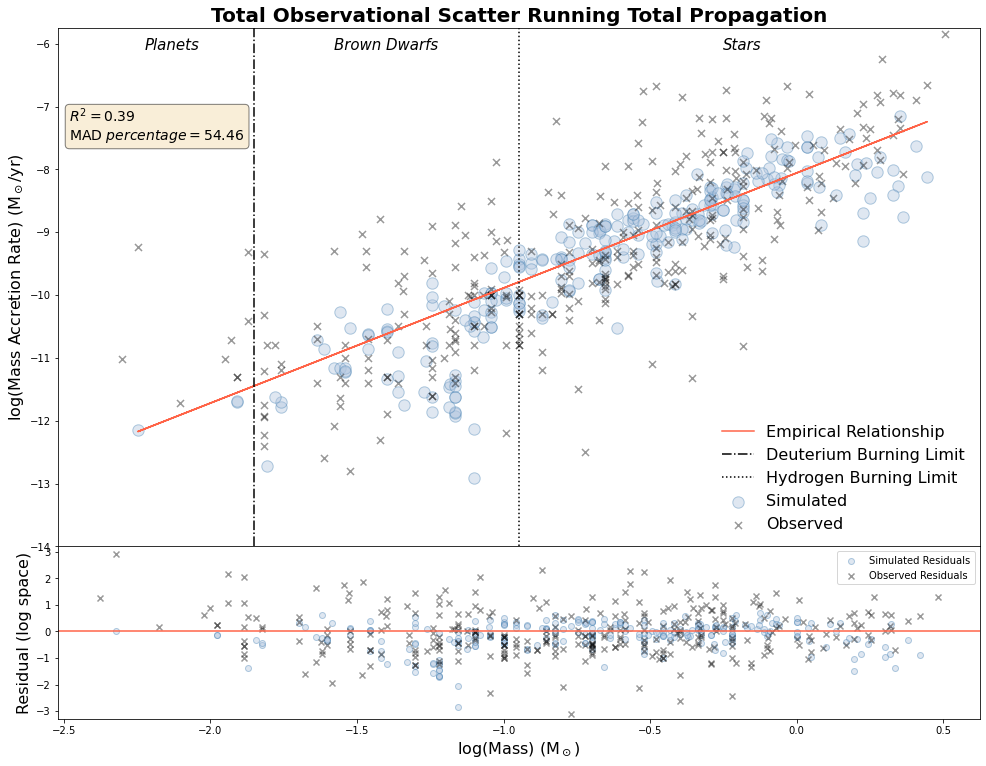

In [116]:
fig = scatter_plot(nolimit, runningtotal_dfs[6], 0.39, 54.46, numMC=1, title=r'Total Observational Scatter Running Total Propagation')
fig.savefig('results_figs/totalobservationalscatter_runningtotal_propagation.png', dpi=500)

In [115]:
mass = []
for r in range(len(simulated)):
    for i in range(numMC):
        mass.append(simulated['Mass (M$_\\odot$)'][r])
mass = np.array(mass)

mdot = []
for r in range(len(simulated)):
    for i in range(numMC):
        if numMC == 1:
            mdot.append(simulated['Mdot (M$_\\odot$)'][r])
        else:
            mdot.append(simulated['Mdot (M$_\\odot$)'][r][i])
mdot = np.array(mdot)

true_mdot = []
for r in range(len(simulated)):
    for i in range(numMC):
        true_mdot.append(simulated['"true" Mdot (M$_\\odot$)'][r])
true_mdot = np.array(true_mdot)

logmass = np.log10(mass)
logMdot = np.log10(mdot)
logaccepted_relation = np.log10(true_mdot)
observed_mass = np.log10(observed['Object Mass M_Solar'])
observed_mdot = np.log10(observed['Accretion Rate M_solar yr-1'])

fig = plt.figure(figsize=(16, 12))
frame1 = fig.add_axes((.1,.3,.8,.6))
frame1.scatter(logmass, logMdot, facecolor='lightsteelblue', edgecolor='steelblue', s=130, alpha=0.4, label='Simulated')
frame1.scatter(observed_mass, observed_mdot, edgecolor='black', facecolor='black', s = 50, marker='x', alpha=0.4, label='Observed')
frame1.plot(logmass, logaccepted_relation, color='tomato', label='Empirical Relationship')
frame1.axvline(x=np.log10(0.012), color='black', linestyle='-.', label='Deuterium Burning Limit')
frame1.axvline(x=np.log10(0.1), color='black', linestyle=':', label='Hydrogen Burning Limit')
frame1.set_xlim(-2.6, 0.6)
frame1.set_ylim(-14, -5.75)
frame1.set_xlabel('log(Mass) (M$_\odot$)', size=16)
frame1.set_ylabel('log(Mass Accretion Rate) (M$_\odot$/yr)', size=16)
frame1.text(-2.3, -6.6, 'Planets', size = 15, fontstyle='italic')
frame1.text(-1.64, -6.6, 'Brown Dwarfs', size = 15, fontstyle='italic')
frame1.text(-0.29, -6.6, 'Stars', size = 15, fontstyle='italic')
frame1.set_title('Monte Carlo Error Propagation', size=20, fontweight='heavy')
frame1.legend(loc='lower right', prop={'family':'sans-serif', 'style':'normal', 'size': 16}, frameon=False, shadow=True)


frame2=fig.add_axes((.1,.1,.8,.2))  
observed_difference = np.log10(observed['Accretion Rate M_solar yr-1']) - np.log10(a.empiricalMdot(observed['Object Mass M_Solar']))
simulated_difference = logMdot - np.log10(a.empiricalMdot(10**logmass))
frame2.axhline(0, color='tomato')
frame2.set_xlabel('log(Mass) (M$_\odot$)', size=16)
frame2.set_ylabel('Residual (log space)', size=16)
frame2.set_ylim(-3.3, 3.2)
frame2.scatter(logmass, simulated_difference, facecolor='lightsteelblue', edgecolor='steelblue', alpha=0.4, label = 'Simulated Residuals')
frame2.scatter(np.log10(observed['Object Mass M_Solar']), observed_difference, facecolor='black', edgecolor='black', marker='x', alpha=0.4, label = 'Observed Residuals')
frame2.legend(frameon=True)

NameError: name 'simulated' is not defined

###  Attempted methods to save scatter table

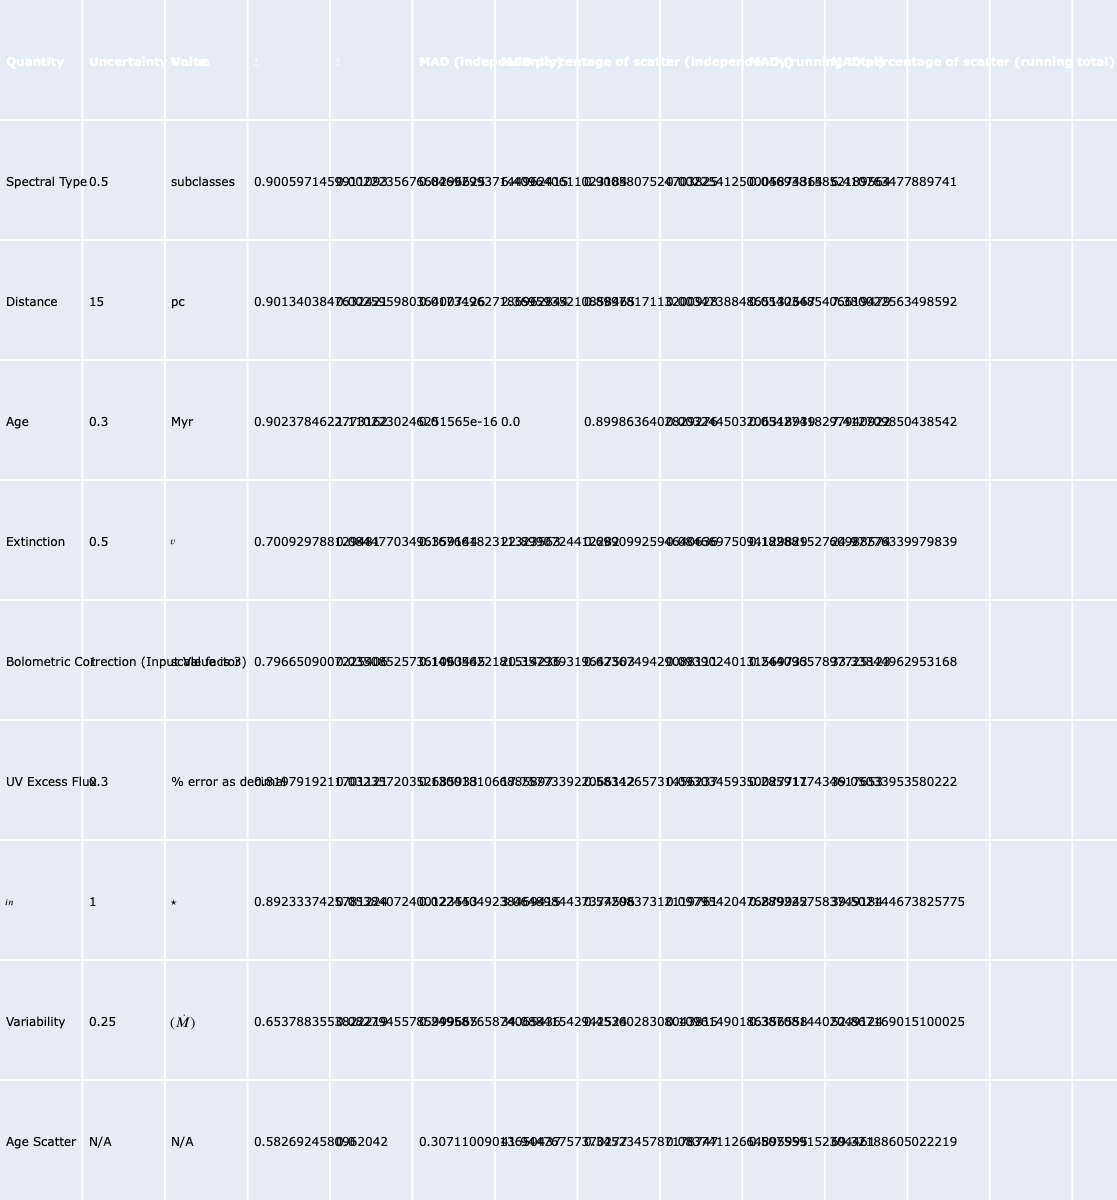

In [262]:
#Save table using plotly
import plotly.figure_factory as ff

fig =  ff.create_table(scatter_df)
fig.update_layout(
    autosize=True,
    width=1500,
    height=1200,
)
#fig.write_image("plotly_scatter_df.png")
fig.show()

In [275]:
#Save table using Bokeh
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="auto",width_policy="auto",index_position=None)
    export_png(data_table, filename = path)

In [274]:
save_df_as_image(scatter_df, 'bokeh_scatter_df.png')

In [254]:
import seaborn as sns

cm = sns.light_palette("red", as_cmap=True)
s = scatter_df.style.background_gradient(cmap=cm, axis=0, subset=[r'mean R$^{2}$ (independently)',
                                        r'R$^{2}$ std. dev. (independently)', 'MAD (independently)', 'MAD percentage of scatter (independently)', 
                                     r'mean R$^{2}$ (running total)', r'R$^{2}$ std. dev. (running total)',
                                  'MAD (running total)', 'MAD percentage of scatter (running total)'])
#s1 = s.style.background_gradient(cmap=cm, axis=1, subset=['MAD (independently)'])
'''
    r'R$^{2}$ std. dev. (independently)', 'MAD (independently)', 'MAD percentage of scatter (independently)', 
                                     r'mean R$^{2}$ (running total)', r'R$^{2}$ std. dev. (running total)',
                                  'MAD (running total)', 'MAD percentage of scatter (running total)'])
'''
s

,Quantity,Uncertainty Value,Units,mean R$^{2}$ (independently),R$^{2}$ std. dev. (independently),MAD (independently),MAD percentage of scatter (independently),mean R$^{2}$ (running total),R$^{2}$ std. dev. (running total),MAD (running total),MAD percentage of scatter (running total)
0,Spectral Type,0.500000,subclasses,0.900597,0.002224,0.046930,6.409641,0.900581,0.002254,0.046938,6.410763
1,Distance,15,pc,0.901340,0.002596,0.017350,2.369594,0.899782,0.003474,0.054035,7.380023
2,Age,0.300000,Myr,0.902378,0.000000,0.000000,0.000000,0.899864,0.003245,0.054274,7.412710
3,Extinction,0.500000,A$_{v}$ mag,0.700930,0.084477,0.167662,22.899072,0.699099,0.084670,0.182882,24.977763
4,Bolometric Correction (Input Value is 3),1,scale factor,0.796651,0.035085,0.149056,20.357939,0.623675,0.093902,0.244097,33.338450
5,UV Excess Flux,0.300000,% error as decimal,0.819792,0.032357,0.130018,17.757734,0.583427,0.093035,0.285918,39.050340
6,R$_{in}$,1,R$_{\star}$,0.892334,0.053841,0.022440,3.064898,0.572084,0.097954,0.289226,39.502145
7,Variability,0.250000,dex $(\dot{M})$,0.653788,0.082795,0.249588,34.088415,0.453603,0.109615,0.387081,52.867169
8,Age Scatter,N/A,N/A,0.582692,0.000000,0.307110,41.944768,0.345235,0.083741,0.507559,69.321886


### First try at a scatter table

In [76]:
error_table = pd.DataFrame(columns=['SpTyUnc', 'distUnc', 'ageUnc', 'AvUnc', 'bc', 'bcUnc', 'UVExcessUnc', 'numMC', 'RinUnc', 'variability', 'age_scatter', 'Observed Scatter', 'Simulated Scatter', 'Percent of Observed Scatter'])

In [81]:
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0.5, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':15, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0.3, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0.5, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':1, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0.3, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':1, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0.5, 'distUnc':15, 'ageUnc':0.3, 'AvUnc':0.5, 'bc':3, 'bcUnc':1, 'UVExcessUnc':0.3, 'numMC':1000, 'RinUnc':1, 'variability':0, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0.5, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0, 'distUnc':0, 'ageUnc':0, 'AvUnc':0, 'bc':3, 'bcUnc':0, 'UVExcessUnc':0, 'numMC':1000, 'RinUnc':0, 'variability':0, 'age_scatter':True, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0.5, 'distUnc':15, 'ageUnc':0.3, 'AvUnc':0.5, 'bc':3, 'bcUnc':1, 'UVExcessUnc':0.3, 'numMC':1000, 'RinUnc':1, 'variability':0, 'age_scatter':True, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0.5, 'distUnc':15, 'ageUnc':0.3, 'AvUnc':0.5, 'bc':3, 'bcUnc':1, 'UVExcessUnc':0.3, 'numMC':1000, 'RinUnc':1, 'variability':0.5, 'age_scatter':False, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)
error_table = error_table.append({'SpTyUnc':0.5, 'distUnc':15, 'ageUnc':0.3, 'AvUnc':0.5, 'bc':3, 'bcUnc':1, 'UVExcessUnc':0.3, 'numMC':1000, 'RinUnc':1, 'variability':0.5, 'age_scatter':True, 'Observed Scatter':None, 'Simulated Scatter':None, 'Percent of Observed Scatter':None}, ignore_index=True)

In [82]:
error_table

,SpTyUnc,distUnc,ageUnc,AvUnc,bc,bcUnc,UVExcessUnc,numMC,RinUnc,variability,age_scatter,Observed Scatter,Simulated Scatter,Percent of Observed Scatter
0,0,0,0,0,3,0,0,1000,0,0,False,0.732177,0,0
1,0.5,0,0,0,3,0,0,1000,0,0,False,0.732177,0.0467164,6.38048
2,0,15,0,0,3,0,0,1000,0,0,False,0.732177,0.0173393,2.36818
3,0,0,0.3,0,3,0,0,1000,0,0,False,0.732177,0,0
4,0,0,0,0.5,3,0,0,1000,0,0,False,0.732177,0.168161,22.9673
5,0,0,0,0,3,1,0,1000,0,0,False,0.732177,0.148635,20.3003
6,0,0,0,0,3,0,0.3,1000,0,0,False,0.732177,0.129699,17.7141
7,0,0,0,0,3,0,0,1000,1,0,False,0.732177,0.0224177,3.06179
8,0.5,15,0.3,0.5,3,1,0.3,1000,1,0,False,0.732177,0.28977,39.5764
9,0,0,0,0,3,0,0,1000,0,0.3,False,0.732177,0.299445,40.8979


In [83]:
for r in range(len(error_table)):
    n = objects.AccretionDistribution(nolimit)
    n.bootstrap()
    n.UVExcessErrorProp(error_table['SpTyUnc'][r], error_table['distUnc'][r], error_table['ageUnc'][r], error_table['AvUnc'][r], error_table['bc'][r], error_table['bcUnc'][r], error_table['UVExcessUnc'][r], error_table['numMC'][r], RinUnc=error_table['RinUnc'][r], variability=error_table['variability'][r], age_scatter=error_table['age_scatter'][r])
    scatter_df = n.create_df()
    scatter = scatter_table(n.observed, scatter_df, numMC=1000)
    error_table['Observed Scatter'][r] = scatter[0]
    error_table['Simulated Scatter'][r] = scatter[1]
    error_table['Percent of Observed Scatter'][r] = scatter[2]

In [84]:
error_table

,SpTyUnc,distUnc,ageUnc,AvUnc,bc,bcUnc,UVExcessUnc,numMC,RinUnc,variability,age_scatter,Observed Scatter,Simulated Scatter,Percent of Observed Scatter
0,0,0,0,0,3,0,0,1000,0,0,False,0.732177,0,0
1,0.5,0,0,0,3,0,0,1000,0,0,False,0.732177,0.0468319,6.39625
2,0,15,0,0,3,0,0,1000,0,0,False,0.732177,0.017408,2.37757
3,0,0,0.3,0,3,0,0,1000,0,0,False,0.732177,0,0
4,0,0,0,0.5,3,0,0,1000,0,0,False,0.732177,0.167317,22.852
5,0,0,0,0,3,1,0,1000,0,0,False,0.732177,0.149452,20.412
6,0,0,0,0,3,0,0.3,1000,0,0,False,0.732177,0.130421,17.8128
7,0,0,0,0,3,0,0,1000,1,0,False,0.732177,0.0223155,3.04783
8,0.5,15,0.3,0.5,3,1,0.3,1000,1,0,False,0.732177,0.288454,39.3967
9,0,0,0,0,3,0,0,1000,0,0.3,False,0.732177,0.300542,41.0477


In [305]:
scatter = scatter_table(nolimit, df_test, numMC=1000)

In [34]:
np.nanmean(observed_difference)

-0.17331220325069616

In [35]:
np.nanmean(simulated_difference)

0.047492667308675796

# Measures of Scatter

### Standard Deviation of Residuals

In [241]:
np.nanstd(observed_difference)

0.9327100886866647

In [240]:
np.nanstd(simulated_difference)

0.2550386588400963

### R squared

### Median Absolute Deviation of Residuals

In [248]:
st.median_absolute_deviation(observed_difference, nan_policy='omit')

0.7991939223607192

In [249]:
st.median_absolute_deviation(simulated_difference, nan_policy='omit')

0.2413630112437912

### Interquartile Range of Residuals

In [99]:
st.iqr(observed_difference, nan_policy='omit')

1.124543623553762

In [100]:
st.iqr(simulated_difference, nan_policy='omit')

0.372278219680501

### Range of Residuals

In [101]:
np.max(observed_difference) - np.min(observed_difference)

6.051027326597552

In [102]:
np.max(simulated_difference) - np.min(simulated_difference)

1.713458444526493

### Variance of Residuals

In [103]:
np.var(observed_difference)

0.7609371965575579

In [104]:
np.var(simulated_difference)

0.08072546828008142

### Median of Absolute Value of Residuals

In [105]:
np.nanmedian(np.abs(observed_difference))

0.5710831545984867

In [106]:
np.nanmedian(np.abs(simulated_difference))

0.18602457684203877

### Mean of Absolute Value of Residuals

In [107]:
np.nanmean(np.abs(observed_difference))

0.681465584928874

In [108]:
np.nanmean(np.abs(simulated_difference))

0.22991739969316607